In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tabulate
import math
import numpy as np
import pingouin as pg

In [66]:
#from github
username = "StefanFSmid"
repository = "ASDA_2025_Group_3_Porfolio"
directory = "additional_material/clean_inflation_df.csv"
github_url = f"https://raw.githubusercontent.com/{username}/{repository}/main/{directory}"
wb_df = pd.read_csv(github_url)

In [67]:
#print the WB data frame shape
print("World Bank DataFrame Shape:", wb_df.shape)

World Bank DataFrame Shape: (12924, 25)


In [68]:
#check column names
print("World Bank DataFrame Columns:", wb_df.columns.tolist())

World Bank DataFrame Columns: ['country', 'code', 'region', 'income_group', 'lending_category', 'year', 'agricultural_land_pct', 'forest_land_pct', 'control_of_corruption_estimate', 'access_to_electricity_pct', 'renewable_energy_consumption_pct', 'co2_emissions', 'pop_density', 'inflation_yr_pct', 'tax_revenue_pct', 'gov_effectiveness_estimate', 'gdp_current_usd_M', 'political_stability_estimate', 'rule_of_law_estimate', 'gov_exp_on_education_pct', 'gov_health_exp_pct', 'life_expectancy_at_birth', 'pop_M', 'voice_and_accountability_estimate', 'co2_per_capita_t']


# Political_Stability vs Inflation

### Direct Relationship

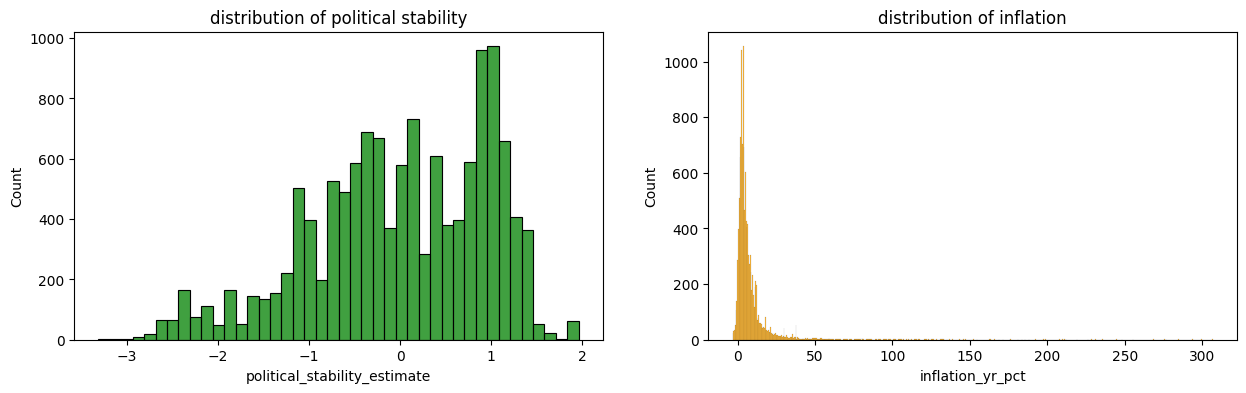

In [69]:
#Histogram
fig, axes = plt.subplots(1, 2, figsize=(15, 4))

sns.histplot(wb_df["political_stability_estimate"], color="green", ax=axes[0])
axes[0].set_title("distribution of political stability")

sns.histplot(wb_df["inflation_yr_pct"], color="orange", ax=axes[1])
axes[1].set_title("distribution of inflation")

plt.show()

<Axes: ylabel='inflation_yr_pct'>

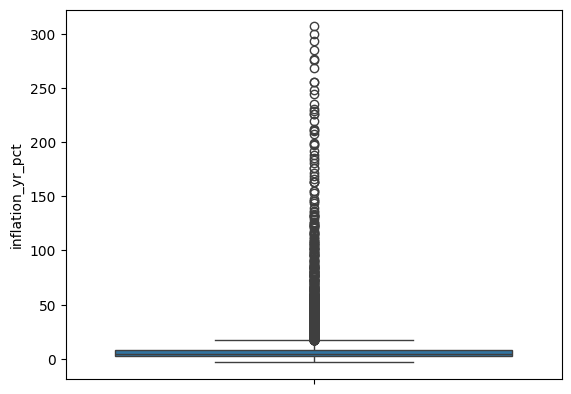

In [70]:
#Checking Outliers in Inflation
sns.boxplot(y=wb_df["inflation_yr_pct"])

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: xlabel='inflation_yr_pct', ylabel='Count'>

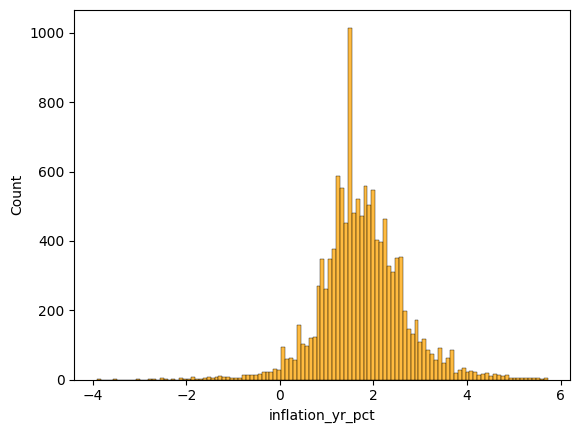

In [71]:
#Log Tranformation for Inflation
inflation_log = np.log1p(wb_df["inflation_yr_pct"])
sns.histplot(inflation_log, color="orange")

In [72]:
#Checking Outliers in Inflation
wb_df[wb_df["inflation_yr_pct"] > 100]

,country,code,region,income_group,lending_category,year,agricultural_land_pct,forest_land_pct,control_of_corruption_estimate,access_to_electricity_pct,...,gov_effectiveness_estimate,gdp_current_usd_M,political_stability_estimate,rule_of_law_estimate,gov_exp_on_education_pct,gov_health_exp_pct,life_expectancy_at_birth,pop_M,voice_and_accountability_estimate,co2_per_capita_t
95,Albania,ALB,Europe & Central Asia,Upper middle income,IBRD,1992,41.13,28.65,-0.65,100.00,...,-0.27,652.17,-0.09,-0.51,3.38,2.67,73.72,3.25,0.09,0.689015
351,Angola,AGO,Sub-Saharan Africa,Lower middle income,IBRD,1992,35.70,63.33,-1.31,36.12,...,-1.09,8307.83,-0.52,-1.28,2.75,1.44,42.21,12.63,-1.13,0.544521
352,Angola,AGO,Sub-Saharan Africa,Lower middle income,IBRD,1997,35.65,62.71,-1.31,36.12,...,-1.09,7675.41,-0.52,-1.28,2.75,1.44,46.31,14.87,-1.13,1.086409
353,Angola,AGO,Sub-Saharan Africa,Lower middle income,IBRD,1998,35.70,62.58,-1.18,36.12,...,-1.06,6506.38,-2.32,-1.53,2.57,1.44,45.06,15.37,-1.41,1.090950
354,Angola,AGO,Sub-Saharan Africa,Lower middle income,IBRD,1999,35.75,62.46,-1.31,36.12,...,-1.09,6152.92,-0.52,-1.28,2.75,1.44,45.39,15.87,-1.13,1.109844
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12827,Zambia,ZMB,Sub-Saharan Africa,Lower middle income,IDA,1990,27.99,63.78,-0.56,13.90,...,-0.79,3285.22,0.15,-0.47,3.74,1.83,47.93,7.69,-0.31,0.356411
12829,Zambia,ZMB,Sub-Saharan Africa,Lower middle income,IDA,1992,28.34,63.68,-0.56,19.20,...,-0.79,3181.92,0.15,-0.47,2.09,1.83,46.51,8.07,-0.31,0.352912
12830,Zambia,ZMB,Sub-Saharan Africa,Lower middle income,IDA,1993,28.52,63.63,-0.56,14.21,...,-0.79,3273.51,0.15,-0.47,1.94,1.83,46.21,8.27,-0.31,0.304039
12920,Zimbabwe,ZWE,Sub-Saharan Africa,Lower middle income,Blend,2019,41.88,45.21,-1.27,46.68,...,-1.32,21832.23,-0.94,-1.30,6.00,0.52,61.29,15.35,-1.16,0.663537


In [73]:
#Remove outlier in Inflation
new_df = wb_df.copy()
condition = wb_df["inflation_yr_pct"] <= 40
new_df = new_df.loc[condition]

<Axes: ylabel='inflation_yr_pct'>

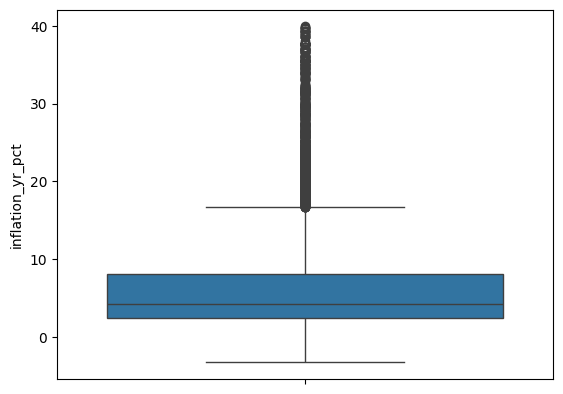

In [79]:
sns.boxplot(y=new_df["inflation_yr_pct"])

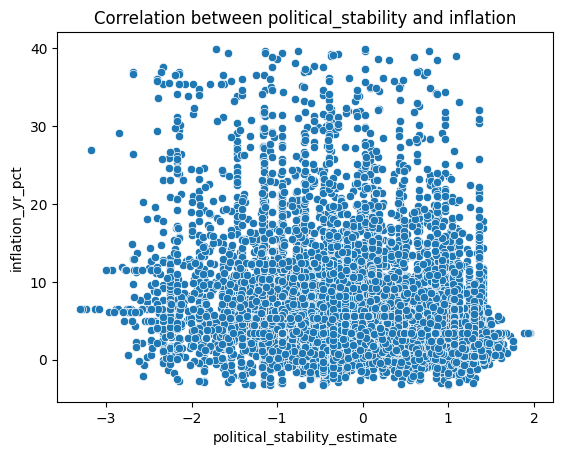

In [83]:
sns.scatterplot(data=new_df, x="political_stability_estimate", y="inflation_yr_pct")
plt.title("Correlation between political_stability and inflation")
plt.show()

In [75]:
#Correlation test (Spearman)
pg.corr(new_df["political_stability_estimate"],new_df["inflation_yr_pct"], method="spearman")

,n,r,CI95%,p-val,power
spearman,12612,-0.325745,"[-0.34, -0.31]",1.530401e-309,1.0


In [80]:
#Correlation test with outliers (Spearman)
pg.corr(wb_df["political_stability_estimate"],wb_df["inflation_yr_pct"], method="spearman")

,n,r,CI95%,p-val,power
spearman,12924,-0.329235,"[-0.34, -0.31]",0.0,1.0


In [77]:
#Correlation test (Pearson)
pg.corr(new_df["political_stability_estimate"],new_df["inflation_yr_pct"], method="pearson")

,n,r,CI95%,p-val,BF10,power
pearson,12612,-0.289355,"[-0.31, -0.27]",9.083172e-242,2.762e+237,1.0


In [78]:
#Correlation test with outliers (Pearson)
pg.corr(wb_df["political_stability_estimate"],wb_df["inflation_yr_pct"], method="pearson")

,n,r,CI95%,p-val,BF10,power
pearson,12924,-0.167882,"[-0.18, -0.15]",2.512012e-82,1.778e+78,1.0


### Group Difference

In [85]:
#Correlation across Income Groups

groups = new_df["income_group"].unique()

for g in groups:
    df_g = new_df[new_df["income_group"] == g]
    print(f"\nGroup: {g}")
    print(pg.corr(df_g["political_stability_estimate"],df_g["inflation_yr_pct"],method="spearman"))



Group: Low income
             n         r           CI95%         p-val     power
spearman  1572 -0.123784  [-0.17, -0.07]  8.526968e-07  0.998511

Group: Upper middle income
             n         r           CI95%         p-val  power
spearman  3293 -0.213782  [-0.25, -0.18]  2.398529e-35    1.0

Group: High income
             n         r           CI95%         p-val  power
spearman  4627 -0.136242  [-0.16, -0.11]  1.298189e-20    1.0

Group: Lower middle income
             n         r          CI95%         p-val  power
spearman  3120 -0.135045  [-0.17, -0.1]  3.593943e-14    1.0


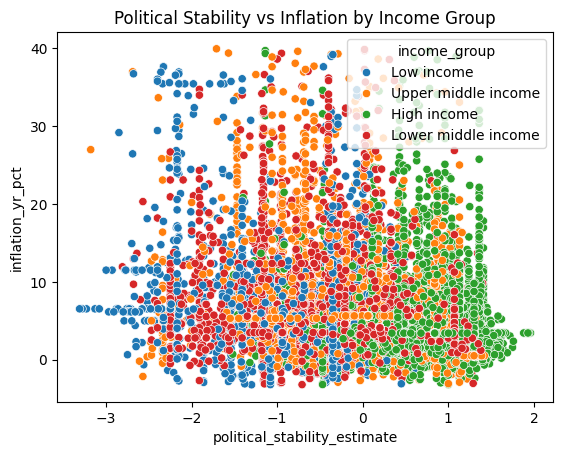

In [ ]:
#Scatterplot by Income Group

sns.scatterplot(
    data=new_df,
    x='political_stability_estimate',
    y='inflation_yr_pct',
    hue='income_group'
)
plt.title("Political Stability vs Inflation by Income Group")
plt.show()

### Temporal Change

In [91]:
#Correlation before and after 2008 financial crisis    

pre = new_df[new_df["year"] < 2008]
print("Pre-2008:")
print(pg.corr(pre["political_stability_estimate"],pre["inflation_yr_pct"],method="spearman"))

post = new_df[new_df["year"] >= 2008]
print("\nPost-2008:")
print(pg.corr(post["political_stability_estimate"],post["inflation_yr_pct"],method="spearman"))

Pre-2008:
             n         r          CI95%          p-val  power
spearman  9386 -0.317805  [-0.34, -0.3]  2.840537e-219    1.0

Post-2008:
             n         r          CI95%          p-val  power
spearman  3226 -0.370461  [-0.4, -0.34]  1.704479e-105    1.0


### Unexpected Patterns

In [ ]:
#Correlation when splitting political stability into bins

new_df["stability_bin"] = pd.cut(
    new_df["political_stability_estimate"],
    bins=4
)

for b in new_df["stability_bin"].unique():
    df_b = new_df[new_df["stability_bin"] == b]
    print(f"\nBin: {b}")
    print(pg.corr(df_b["political_stability_estimate"],df_b["inflation_yr_pct"],method="spearman"))



Bin: (-3.315, -1.993]
            n         r         CI95%     p-val     power
spearman  497  0.139597  [0.05, 0.22]  0.001811  0.878189

Bin: (-0.675, 0.642]
             n         r           CI95%         p-val     power
spearman  5451 -0.067276  [-0.09, -0.04]  6.641597e-07  0.998709

Bin: (-1.993, -0.675]
             n         r          CI95%     p-val     power
spearman  2430  0.005652  [-0.03, 0.05]  0.780638  0.058926

Bin: (0.642, 1.96]
             n         r          CI95%         p-val  power
spearman  4234 -0.132694  [-0.16, -0.1]  4.316378e-18    1.0


## The Story of Political Stability vs Inflation

### 1. Relationship between political Stability and Inflation
This analysis investigates how political stability relates to inflation worldwide. Overall, there is a weak negative correlation (Spearman ρ ≈ −0.325), suggesting that countries with higher political stability tend to experience slightly lower inflation, though the relationship is not strong.

### 2. Differences Across Income Groups
Examining correlations within income groups reveals that the relationship varies slightly across economic contexts:
- Low-income countries: ρ ≈ −0.124 (n=1572), indicating a weak negative association.
- Lower-middle-income countries: ρ ≈ −0.135 (n=3120), also weakly negative.
- Upper-middle-income countries: ρ ≈ −0.214 (n=3293), slightly stronger negative correlation.
- High-income countries: ρ ≈ −0.136 (n=4627), weakly negative.

This shows that political stability’s link to inflation is generally negative across all income levels, with the effect slightly more pronounced in upper-middle-income nations.

### 3. Temporal Changes (Pre- vs Post-2008 Financial Crisis)
The correlation before and after the 2008 financial crisis reflects shifts in global economic dynamics. Pre-crisis and post-crisis periods show that the relationship between stability and inflation fluctuates over time, emphasizing that historical context matters when interpreting macroeconomic patterns.

### 4. Unexpected Patterns (Binning Political Stability)
When political stability is divided into bins, a more nuanced pattern emerges:
- Very unstable countries (−3.315 to −1.993): ρ ≈ +0.140, surprisingly showing a slight positive association.
- Moderately unstable (−1.993 to −0.675): ρ ≈ +0.006, essentially no correlation.
- Slightly stable to neutral (−0.675 to 0.642): ρ ≈ −0.067, weak negative.
- Highly stable (0.642 to 1.96): ρ ≈ −0.133, weakly negative.

This reveals that nonlinear patterns exist: in the least stable countries, inflation can sometimes increase with stability, while in more stable nations, the expected negative relationship dominates.